<a href="https://colab.research.google.com/github/viktorngkhnh/Sunspots_Practice/blob/main/Colab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
scores = [8.5, 6.7, 9.0, 5.5, 7.8, 4.0, 8.0]
total_sum = 0.0 # Changed 'sum' to 'total_sum' to avoid shadowing built-in sum function
for i in range(len(scores)):
  total_sum += scores[i] # Corrected from scores[1] to scores[i] to sum all elements
print("Total sum:", total_sum)

scores1 = []
for i in range(len(scores)):
  if scores[i] >= 7:
    scores1.append(scores[i]) # Corrected: Use .append() to add elements to the list
print("Scores >= 7:", scores1)

# Corrected sorting loop
for i in range(len(scores)):
  for j in range(i + 1, len(scores)): # Corrected: Syntax for inner loop
    if scores[i] < scores[j]:
      scores[i], scores[j] = scores[j], scores[i]
# Moved print statement outside the loops to show the final sorted list
print("Sorted scores (descending):", scores)

In [ ]:
import pandas as pd
import numpy as np

student = {
    "name": "Ninh",
    "age": 22,
    "courses": ["AI", "ML", "Signal Processing"],
    "scores": {"AI": 8.5, "ML": 7.0, "Signal Processing": 6.5}
}
print(student['courses'])
sum = 0
### Scores mean ####
for i in student['scores']:
  sum += student['scores'][i]
print(sum/len(student['scores']))
print(np.mean(sum))
########################
student['courses'].append('Deep Learning')
print(student['courses'])
student['scores']['Deep Learning'] = 8.0
print(student['scores'])

['AI', 'ML', 'Signal Processing']
7.333333333333333
22.0
['AI', 'ML', 'Signal Processing', 'Deep Learning']
{'AI': 8.5, 'ML': 7.0, 'Signal Processing': 6.5, 'Deep Learning': 8.0}


In [ ]:
import numpy as np

x = np.array([1, 2, 3, 4])
W = np.array([[1, 0],
              [0, 1],
              [1, 1],
              [-1, 2]])
y = x*2
print (y)
xsum = 0
for i in range(len(x)):
  xsum += x[i]
print (xsum)
# Corrected the typo 'resharpe' to 'reshape' and assigned the result to a new variable for matrix multiplication.
x_reshaped = x.reshape(1,4) # Reshape x to a 1x4 row vector
print (x_reshaped)
print (x_reshaped @ W)

In [ ]:
# def accuracy(y_true, y_pred):
#   count = 0
#   for i in range(len(y_true)):
#     if y_true[i] == y_pred[i]:
#       count += 1
#   return count/len(y_true)
TP = TN = FP = FN = 0
y_true = [1, 0, 1, 1, 0, 1]
y_pred = [1, 1, 1, 0, 0, 1]
for i,j in zip(y_true, y_pred):
  if i == 1:
    if j == 1:
      TP += 1
    else:
      FN += 1
  else:
    if j == 1:
      FP += 1
    else:
      TN += 1
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2*precision*recall/(precision+recall)
print(TP, TN, FP, FN)
# print(precision, recall, F1)
confusion_matrix = [[TN, FP], [FN, TP]]
print(confusion_matrix)


In [ ]:
import numpy as np

def accuracy(y_true, y_pred):
    y_true_flat = y_true.flatten()
    y_pred_flat = y_pred.flatten()
    return np.mean(y_true_flat == y_pred_flat)

def precision(y_true, y_pred):
    TP = FP = 0
    y_true_flat = y_true.flatten()
    y_pred_flat = y_pred.flatten()
    for yt, yp in zip(y_true_flat, y_pred_flat):
        if yp == 1:
            if yt == 1:
                TP += 1
            else:
                FP += 1
    return TP / (TP + FP) if (TP + FP) > 0 else 0

def recall(y_true, y_pred):
    TP = FN = 0
    y_true_flat = y_true.flatten()
    y_pred_flat = y_pred.flatten()
    for yt, yp in zip(y_true_flat, y_pred_flat):
        if yt == 1:
            if yp == 1:
                TP += 1
            else:
                FN += 1
    return TP / (TP + FN) if (TP + FN) > 0 else 0

def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * p * r / (p + r) if (p + r) > 0 else 0

def confusion_matrix(y_true, y_pred):
    TP = TN = FP = FN = 0
    y_true_flat = y_true.flatten()
    y_pred_flat = y_pred.flatten()
    for yt, yp in zip(y_true_flat, y_pred_flat):
        if yt == 1 and yp == 1:
            TP += 1
        elif yt == 0 and yp == 0:
            TN += 1
        elif yt == 0 and yp == 1:
            FP += 1
        elif yt == 1 and yp == 0:
            FN += 1
    return [[TN, FP], [FN, TP]]

np.random.seed(0)

# Tạo 100 điểm dữ liệu
X = np.random.randn(100, 2)            # 2 features
weights_true = np.array([1.5, -2.0])   # trọng số thật
bias_true = -0.3

# sinh nhãn theo logistic function
logits = X @ weights_true + bias_true
prob = 1 / (1 + np.exp(-logits))
y = (prob > 0.5).astype(int).reshape(-1, 1)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def loss_fn(y, y_pred):
    eps = 1e-8
    return -np.mean(y * np.log(y_pred + eps) + (1 - y) * np.log(1 - y_pred + eps))

W = np.zeros((2, 1))
b = 0
lr = 0.1

for epoch in range(2000):
    # Forward
    logits = X @ W + b
    y_pred = sigmoid(logits)

    # Compute gradients
    dW = (X.T @ (y_pred - y)) / len(X)
    db = np.mean(y_pred - y)

    # Update
    W -= lr * dW
    b -= lr * db

    if epoch % 200 == 0:
        print("Epoch", epoch, "Loss =", loss_fn(y, y_pred))
    # Corrected indentation for y_pred_class
    y_pred_class = (y_pred > 0.5).astype(int)

# These print statements should be outside the loop to print final metrics.
print("Accuracy:", accuracy(y, y_pred_class))
print("Precision:", precision(y, y_pred_class))
print("Recall:", recall(y, y_pred_class))
print("F1:", f1_score(y, y_pred_class))
print("Confusion:", confusion_matrix(y, y_pred_class))

Epoch 0 Loss = 0.6931471605599454
Epoch 200 Loss = 0.19777610478723084
Epoch 400 Loss = 0.1469776041416811
Epoch 600 Loss = 0.12293215688363446
Epoch 800 Loss = 0.1080899710722507
Epoch 1000 Loss = 0.09773858612702128
Epoch 1200 Loss = 0.08998356108904458
Epoch 1400 Loss = 0.08389164023091662
Epoch 1600 Loss = 0.07894142415181019
Epoch 1800 Loss = 0.07481529964178074
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
Confusion: [[59, 0], [0, 41]]


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: (60000, 28, 28, 1)
Testing samples: (10000, 28, 28, 1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8702 - loss: 0.4422 - val_accuracy: 0.9698 - val_loss: 0.1070
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9674 - loss: 0.1144 - val_accuracy: 0.9742 - val_loss: 0.0839
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9774 - loss: 0.0683 - val_accuracy: 0.9725 - val_loss: 0.0924
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9829 - loss: 0.0536 - val_accuracy: 0.9748 - val_loss: 0.0893
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9871 - loss: 0.0414 - val_accuracy: 0.9780 - val_loss: 0.0802
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9897 - loss: 0.0301 - val_accuracy: 0.9770 - val_loss: 0.0849
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9921 - loss: 0.0239 - val_accuracy: 0.9768 - val_loss: 0.0920
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9923 - loss: 0.0231 - 

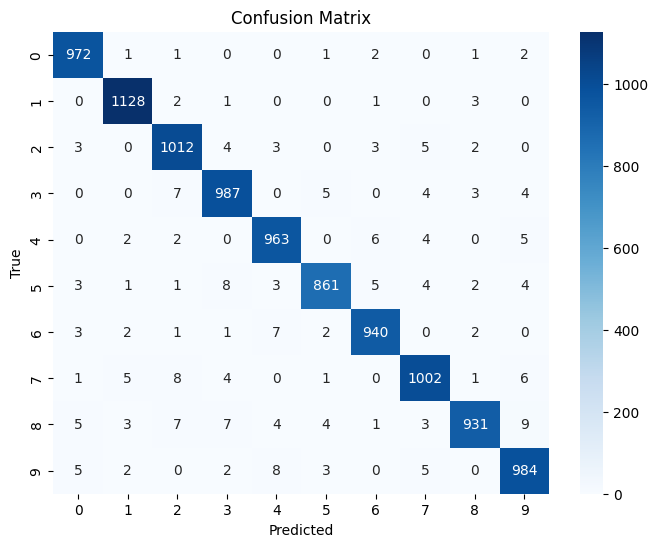

In [ ]:

import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

#----Minst------#
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

#standardization
x_train = x_train / 255.0
x_test = x_test / 255.0

#expan
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print("Training samples:", x_train.shape)
print("Testing samples:", x_test.shape)

#---------------------#

model = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 lớp cho số 0..9
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#----------Train---------#
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1
)


loss, acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {acc:.4f}")
pred = model.predict(x_test)
y_pred = np.argmax(pred, axis=1)

# ========================
# 8. Confusion Matrix
# ========================
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Mounted at /content/drive
(2520, 12) (2520,)
Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 556.3057 - val_loss: 268.1923
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 277.5219 - val_loss: 246.8695
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 254.2018 - val_loss: 244.8459
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 241.0894 - val_loss: 240.8175
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 234.3434 - val_loss: 237.0492
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 224.3390 - val_loss: 238.1728
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 217.7919 - val_loss: 234.9356
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 208.0969 - val_loss: 232.2080
Epoch 9/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 227.0853 - val_loss: 238.3663
Epoch 10/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 229.3284 - val_loss: 232.3515
Epoch 11/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 236.5016 - val_loss: 232.8531
Epoch 12/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s

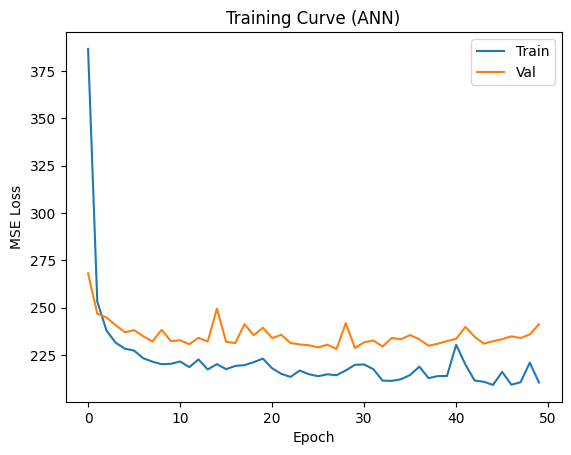

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
ANN MSE: 342.6176211468815
ANN MAE: 13.709312420326567


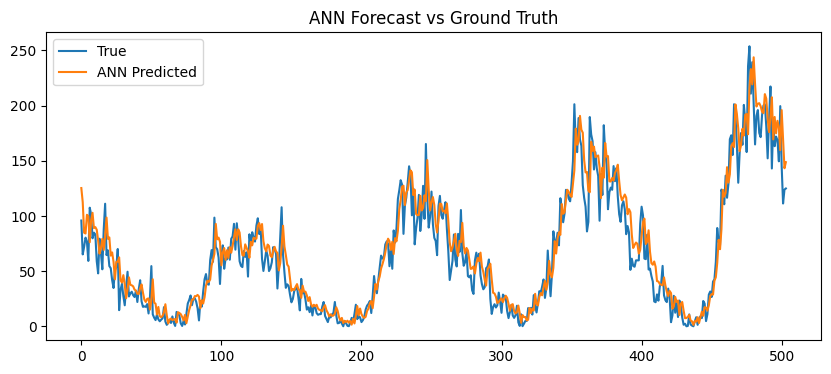

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Connect Drive

drive.mount('/content/drive', force_remount=True)
# !ls "/content/drive/MyDrive/Sunspots_training"

df = pd.read_csv('/content/drive/MyDrive/Sunspots_training/Sunset_Train.txt')

data = df['Sunspots'].values

def create_dataset(series, window_size):
    X, y = [], []
    for i in range(len(series) - window_size):
        X.append(series[i:i+window_size])
        y.append(series[i+window_size])
    return np.array(X), np.array(y)

window_size = 12
X, y = create_dataset(data, window_size)

print(X.shape, y.shape)


split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# model = LinearRegression()
# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)

# print("MSE:", mse)

# from sklearn.metrics import mean_absolute_error
# mae = mean_absolute_error(y_test, y_pred)
# print("MAE:", mae)

# plt.figure(figsize=(15, 6))
# plt.plot(y_test[:200], label='Actual', color='blue')
# plt.plot(y_pred[:200], label='Predicted', color='red', linestyle='--')
# plt.title('Compare Sunspots Predict by Linear Regression (Training data)')
# plt.xlabel('Month')
# plt.ylabel('Sunspots')
# plt.legend()
# plt.show()

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1)
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse'
)

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)


plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.title("Training Curve (ANN)")
plt.show()

y_pred_ann = model.predict(X_test).flatten()

mse_ann = mean_squared_error(y_test, y_pred_ann)
mae_ann = mean_absolute_error(y_test, y_pred_ann)

print("ANN MSE:", mse_ann)
print("ANN MAE:", mae_ann)

plt.figure(figsize=(10,4))
plt.plot(y_test, label="True")
plt.plot(y_pred_ann, label="ANN Predicted")
plt.legend()
plt.title("ANN Forecast vs Ground Truth")
plt.show()

Mounted at /content/drive
=== Linear Regression ===
MSE: 12.445891499851191
MAE: 2.5298752343391757


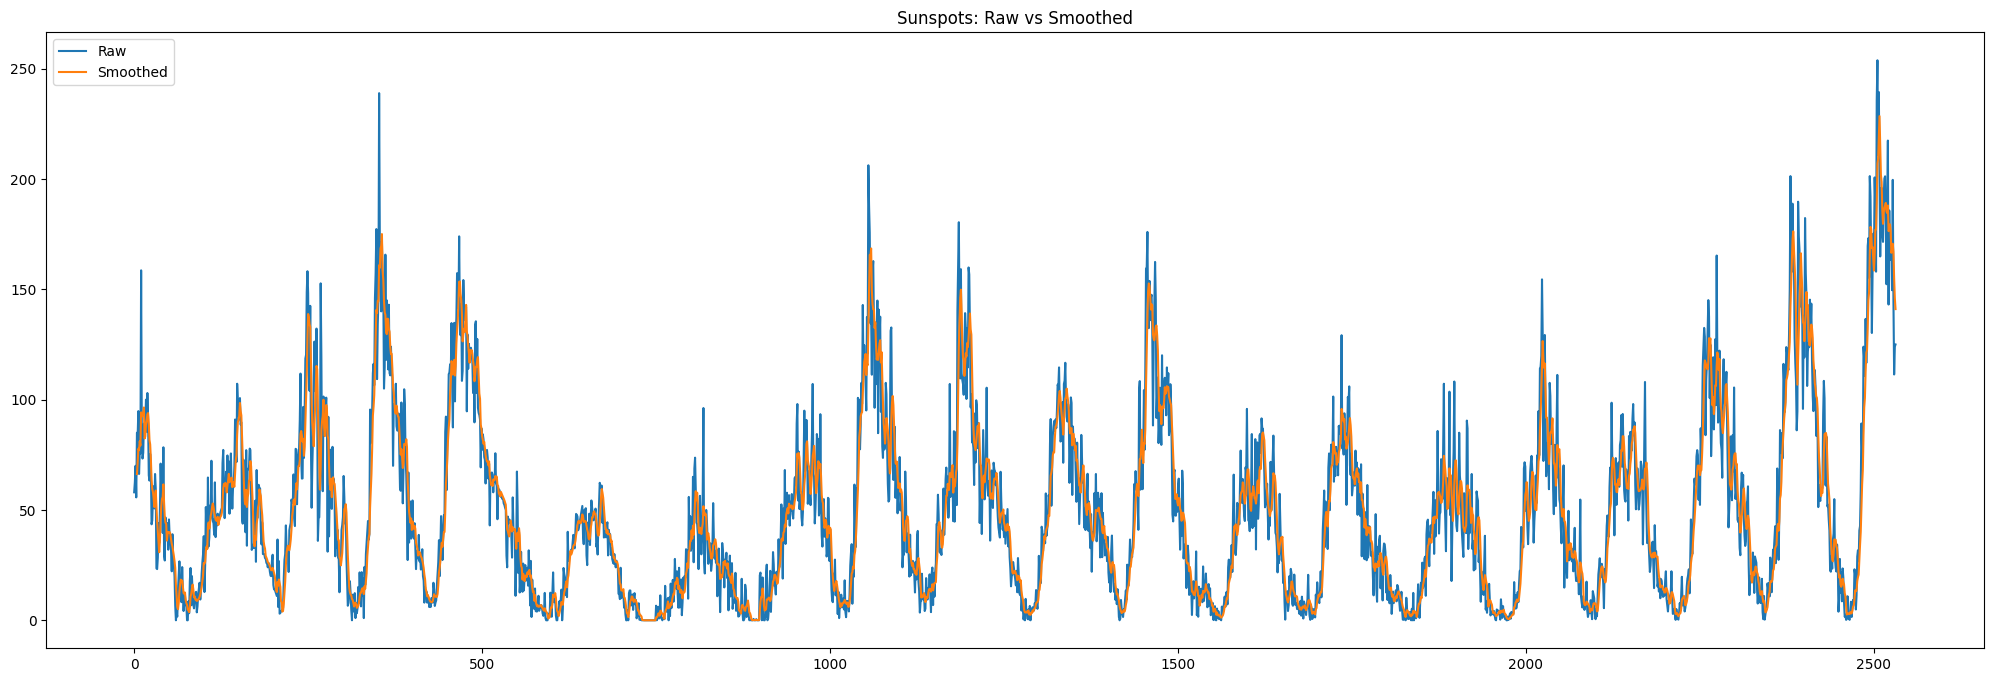

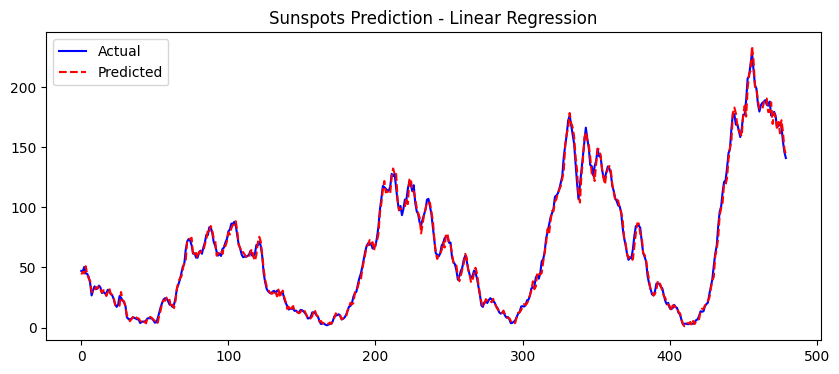

In [6]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Connect Drive

drive.mount('/content/drive', force_remount=True)
# !ls "/content/drive/MyDrive/Sunspots_training"

df = pd.read_csv('/content/drive/MyDrive/Sunspots_training/Sunset_Train.txt')

series = df['Sunspots'].values

# ===============================
def create_dataset(series, window_size):
    X, y = [], []
    for i in range(len(series) - window_size):
        X.append(series[i:i+window_size])
        y.append(series[i+window_size])
    return np.array(X), np.array(y)


#====Add the pre-processing======
def moving_average(series, window):
    return np.convolve(series, np.ones(window)/window, mode='valid')

smooth_window = 5
series_smooth = moving_average(series, smooth_window)


window_size = 132
X, y = create_dataset(series_smooth, window_size)


split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled  = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))

# =====Train Linear Regression=====

model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train_scaled)

# ========Predict=============

y_pred_scaled = model_lr.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# ========Evaluation=============
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("=== Linear Regression ===")
print("MSE:", mse)
print("MAE:", mae)



#======Result============
t = np.arange(len(y_test))


plt.figure(figsize=(25,8))
plt.plot(series, label="Raw")
plt.plot(
    np.arange(smooth_window-1, len(series)),
    series_smooth,
    label="Smoothed"
)
plt.legend()
plt.title("Sunspots: Raw vs Smoothed")
plt.show()


plt.figure(figsize=(10,4))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red', linestyle='--')
plt.title("Sunspots Prediction - Linear Regression")
plt.legend()
plt.show()



Mounted at /content/drive
(2520, 12) (2520,)
Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1589.3259 - val_loss: 307.9149
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 265.5291 - val_loss: 276.3210
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 237.9360 - val_loss: 266.9527
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 251.3726 - val_loss: 257.7030
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 220.1893 - val_loss: 250.4803
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 222.8387 - val_loss: 248.9397
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 225.2727 - val_loss: 244.6705
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 248.4276 - val_loss: 243.1395
Epoch 9/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 198.2503 - val_loss: 243.4809
Epoch 10/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 230.4615 - val_loss: 248.5704
Epoch 11/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 224.1060 - val_loss: 259.2756
Epoch 12/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1

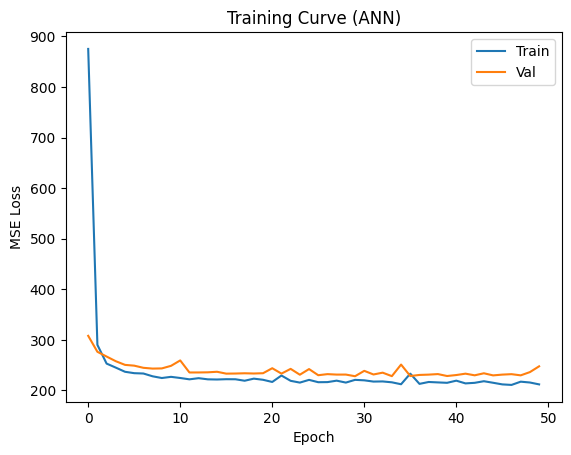

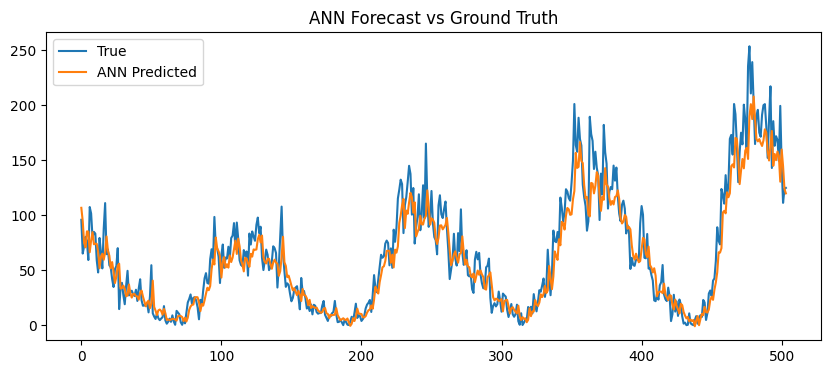

In [5]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.models import Sequential


# ===============================
# Connect Drive

drive.mount('/content/drive', force_remount=True)
# !ls "/content/drive/MyDrive/Sunspots_training"

df = pd.read_csv('/content/drive/MyDrive/Sunspots_training/Sunset_Train.txt')

data = df['Sunspots'].values
# ===============================
# Create supervised dataset
# ===============================
def create_dataset(data, window_size):
    X, y = [], []
    for i in range(len(series) - window_size):
        X.append(series[i:i+window_size])
        y.append(series[i+window_size])
    return np.array(X), np.array(y)

window_size = 12
X, y = create_dataset(data, window_size)

print(X.shape, y.shape)


split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

##### Scaling (fit on train only) #######3

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled  = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))


######## Build ANN model ###########
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1)
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse'
)

######### Train ANN  ##########
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)


y_pred_ann = model.predict(X_test).flatten()

mse_ann = mean_squared_error(y_test, y_pred_ann)
mae_ann = mean_absolute_error(y_test, y_pred_ann)

print("ANN MSE:", mse_ann)
print("ANN MAE:", mae_ann)

plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.title("Training Curve (ANN)")
plt.show()

plt.figure(figsize=(10,4))
plt.plot(y_test, label="True")
plt.plot(y_pred_ann, label="ANN Predicted")
plt.legend()
plt.title("ANN Forecast vs Ground Truth")
plt.show()

# print(len(y_test))
# print(y_test[:5])
# print(y_test[-5:])